Описание проекта

Название проекта: Определение перспективного тарифа для телеком-компании

Описание исследования.
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Цель исследования: на материале анализа исходных данных определить, какой тариф лучше

Суть исследования: Проанализировать поведение абонентов в рамках двух тарифов Мегалайн Смарт и Ультра  

Задачи исследования: 
1) проанализировать исходные данные,
2) проверить на аномалии и убрать их,
3) создать сводные таблицы по разным показателям (сообщения, трафик, звонки) по клиентам с данными по месяцам.
4) По каждому показателю посчитать: среднее арифметическое, дисперсию, стандартное отклонение и построить гистограммы
5) создать сводную таблицу с выручкой и проанализировать
6) сделать две выборки по тарифному плану и по городу клиента
6) сформулировать нулевые гипотезы по этим двум выборкам и проверить эти гипотезы
Исходные данные: 

Описание тарифов
Тариф «Смарт»

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        минута разговора: 3 рубля
        сообщение: 3 рубля
        1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        минута разговора: 1 рубль
        сообщение: 1 рубль
        1 Гб интернет-трафика: 150 рублей

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime as dt
from functools import reduce
idx = pd.IndexSlice
calls = pd.read_csv('/datasets/calls.csv')
#calls.to_csv('calls.csv', index=False)
display(calls.head(10))
calls.info()




,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Посмотрим на график распределения длительности звонков:

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


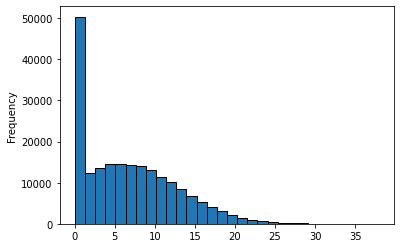

In [2]:
calls['duration'].plot(kind ='hist', ec ='black', bins = 30)
calls.describe()

Вывод: большое число звонков около нуля, но согласно тарифам, они будут засчитаны, как звонок на целую минуту.

In [3]:
internet = pd.read_csv('/datasets/internet.csv')
#internet.to_csv('internet.csv', index = False)
display(internet.head(10))
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице нет пропусков данных, нужно привести столбец с датой к соотвествующему типу для дальнейшей работы и убрать столбец Unnamed, так как он неинформативен

Посмотрим на гистограмму использования трафика

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


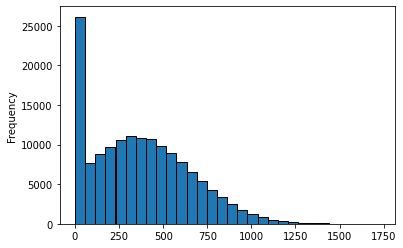

In [4]:
internet['mb_used'].plot(kind ='hist', ec ='black', bins = 30)
internet.describe()

Вывод: большое число около нуля, согласно тарифам, они не будут засчитаны, так что можем сократить число строк с нулями или пренебречь этими данными.

In [5]:
messages = pd.read_csv('/datasets/messages.csv')
#messages.to_csv('messages.csv', index = False)
display(messages.head(10))
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В этой таблице нет пропусков данных.

In [6]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [7]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
#tariffs.to_csv('tariffs.csv', index = False)
tariffs['gb_included']=np.ceil(tariffs['mb_per_month_included'] / 1024).astype(int)
display(tariffs.head(10))
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
 8   gb_included            2 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 272.0+ bytes


Вывод: Таблица не требует обработки

In [8]:
users = pd.read_csv('/datasets/users.csv')
#users.to_csv('users.csv', index = False)
display(users.head(10))
users['last_name'].unique() 
print(users.duplicated().sum())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропуск данных в столбце "churn_date", заполнять не нужно, так как соответствует условию, что заполнено только для тех пользователей, которые прекратили пользоваться тарифом

#### Шаг 2. Подготовка данных

In [9]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format = '%Y-%m-%d', errors ='coerce')
internet['session_date'] = pd.to_datetime(internet['session_date'],format = '%Y-%m-%d', errors ='coerce')
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d', errors ='coerce')
users['reg_date'] = pd.to_datetime(users['reg_date'],format = '%Y-%m-%d', errors ='coerce')
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep", "Oct", "Nov", "Dec"] # месяцы для создания таблиц
users['user_id'] = np.ceil(users['user_id']).astype('str')

Найдем и исправим ошибки в данных, если они есть.

In [10]:
internet.drop('Unnamed: 0', axis = 1, inplace = True) #убрали неинформативный столбец

In [11]:
#исключим строки, когда вход в интернет был зафиксирован, но трафика не было:
internet.query('mb_used == 0').count() 
internet = internet.query('mb_used != 0')

In [12]:
#Посмотрим строки, когда звонок был пропущен, но был зафиксирован:
calls.query('duration == 0').count()
calls = calls.query('duration != 0')

In [13]:
print('Звонили', calls['user_id'].nunique())
print('Писали', messages['user_id'].nunique())
print('Пользовались интернетом', internet['user_id'].nunique())

Звонили 492
Писали 426
Пользовались интернетом 497


Таким образом, среди всех клиентов не пользовались интернетом 3 человека, не звонили 8, не писали 74. В большей степени, клиенты используют интернет-услугу.

Создадим дополнительные столбцы с данными по месяцам для дальнейшего анализа

In [14]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month
#data_final = pd.merge(left, on=['user_id', 'month'])
#display(data_final)

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам
    

In [15]:
#для округления звонков 
calls['duration'] = np.ceil(calls['duration']).astype(int)
#число звонков в месяц по пользователям
calls_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
calls_month.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls_month['user_id'] = np.ceil(calls_month['user_id']).astype('str')
calls_month=calls_month.merge(users[['user_id', 'tariff']], on = 'user_id')
#calls_month['month'] = calls_month['month'].replace[month for month in months]
calls_month.head()
#count_calls_month = calls.pivot_table(index ='user_id', columns = 'month', values = 'duration', aggfunc = 'count')
#count_calls_month.columns = ["cou_cal_"+month for month in months]
#count_calls_month = count_calls_month.reset_index()
#count_calls_month = count_calls_month.merge(users[['user_id', 'tariff']], on = 'user_id')
#count_calls_month = count_calls_month.fillna(0)
#count_calls_month['user_id'] = np.ceil(count_calls_month['user_id']).astype(objs)
#count_calls_month.head(10)

,user_id,month,calls_count,calls_sum,tariff
0,1000.0,5,17,159,ultra
1,1000.0,6,28,172,ultra
2,1000.0,7,41,340,ultra
3,1000.0,8,42,408,ultra
4,1000.0,9,46,466,ultra


#суммарная длительность звонков за месяц
calls_month = calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='sum')
calls_month.columns = ["cal_"+month for month in months]
calls_month = calls_month.reset_index()
#calls_month=calls_month.merge(users[['user_id', 'tariff']], on = 'user_id')
calls_month = calls_month.fillna(0)
calls_month['user_id'] = np.ceil(calls_month['user_id']).astype('str')
calls_month['cal_mean']=calls_month.mean(axis=1)
calls_month.head(10)

In [16]:
#calls = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
#calls.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
#calls.head()

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам

In [17]:
messages_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count']).reset_index()
messages_month.columns = ['user_id', 'month', 'messages_count']
messages_month.head()
#calls_month=calls_month.merge(users[['user_id', 'tariff']], on = 'user_id')
#messages_month = messages.pivot_table(index='user_id', columns='month', values='id', aggfunc='count')
#messages_month.columns = ["mes_"+month for month in months]
#messages_month = messages_month.reset_index()
messages_month = messages_month.astype(np.int)
messages_month['user_id'] = np.ceil(messages_month['user_id']).astype('str')
messages_month=messages_month.merge(users[['user_id', 'tariff']], on = 'user_id')
#messages_month = messages_month.fillna(0)
#messages_month['mes_mean']=messages_month.mean(axis=1)
messages_month.head(10)

/tmp/ipykernel_1346/1702171342.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  messages_month = messages_month.astype(np.int)


,user_id,month,messages_count,tariff
0,1000.0,5,22,ultra
1,1000.0,6,60,ultra
2,1000.0,7,75,ultra
3,1000.0,8,81,ultra
4,1000.0,9,57,ultra
5,1000.0,10,73,ultra
6,1000.0,11,58,ultra
7,1000.0,12,70,ultra
8,1002.0,6,4,smart
9,1002.0,7,11,smart


Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам

In [18]:
internet_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum']).reset_index()
internet_month.columns = ['user_id', 'month', 'internet_sum']
#для округления трафика 
internet_month['internet_sum'] = np.ceil(internet["mb_used"] / 1024).astype(int)
internet_month['user_id'] = np.ceil(internet_month['user_id']).astype('str')
internet_month = internet_month.merge(users[['user_id', 'tariff']], on = 'user_id')
#internet_month['int_mean']=internet_month.mean(axis=1)
internet_month.head(10)

,user_id,month,internet_sum,tariff
0,1000.0,5,1.0,ultra
1,1000.0,6,2.0,ultra
2,1000.0,7,2.0,ultra
3,1000.0,8,1.0,ultra
4,1000.0,9,1.0,ultra
5,1000.0,10,1.0,ultra
6,1000.0,11,1.0,ultra
7,1000.0,12,1.0,ultra
8,1001.0,11,1.0,smart
9,1001.0,12,1.0,smart


Посчитаем для каждого пользователя помесячную выручку с каждого пользователя.

In [19]:
#сделаем сборную таблицу данных
data = [calls_month, messages_month, internet_month]
data_mix = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data)
data_mix=data_mix.drop(['tariff_x','tariff_y'], axis = 1)
data_mix = data_mix.fillna(0)
data_mix.info(10)
#data_mix = calls_month.join(internet_month, on='month', how='outer')
#data_mix.head(10)
#data_mix = data_mix.merge(messages_month, on='user_id', how='outer')
#data_mix = data_mix.merge(users[['user_id','tariff']], on='user_id', how='right')
data_mix = data_mix.merge(users[['user_id','city']], on='user_id', how='right')
data_mix.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   object 
 1   month           3214 non-null   int64  
 2   calls_count     3214 non-null   float64
 3   calls_sum       3214 non-null   float64
 4   messages_count  3214 non-null   float64
 5   internet_sum    3214 non-null   float64
 6   tariff          3214 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 200.9+ KB


,user_id,month,calls_count,calls_sum,messages_count,internet_sum,tariff,city
0,1000.0,5.0,17.0,159.0,22.0,1.0,ultra,Краснодар
1,1000.0,6.0,28.0,172.0,60.0,2.0,ultra,Краснодар
2,1000.0,7.0,41.0,340.0,75.0,2.0,ultra,Краснодар
3,1000.0,8.0,42.0,408.0,81.0,1.0,ultra,Краснодар
4,1000.0,9.0,46.0,466.0,57.0,1.0,ultra,Краснодар
5,1000.0,10.0,44.0,350.0,73.0,1.0,ultra,Краснодар
6,1000.0,11.0,37.0,338.0,58.0,1.0,ultra,Краснодар
7,1000.0,12.0,38.0,333.0,70.0,1.0,ultra,Краснодар
8,1001.0,11.0,45.0,430.0,0.0,1.0,smart,Москва
9,1001.0,12.0,47.0,414.0,0.0,1.0,smart,Москва


In [20]:
# функция подсчета выручки с каждого пользователя в месяц
def vyruchka(row):
    messages = row['messages_count']
    gb_used = row['internet_sum']
    tariff = row['tariff']
    duration = row['calls_sum']
    calls = row['calls_count']
    
    if tariff == 'smart':
        extra_duration = duration - tariffs.loc[0, 'minutes_included']
        extra_gb = gb_used - (tariffs.loc[0, 'gb_included'])
        extra_messages = messages - tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_gb < 0: extra_gb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[0, 'rub_per_gb'] / 1024) * extra_gb + 
                   tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else:
        extra_duration = duration - tariffs.loc[1, 'minutes_included']
        extra_gb = gb_used - (tariffs.loc[1, 'gb_included'])
        extra_messages = messages - tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_gb < 0: extra_gb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[1, 'rub_per_gb'] / 1024) * extra_gb + 
                   tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

data_mix['vyruchka'] = data_mix.apply(vyruchka, axis=1)
data_mix.head(10)

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,tariff,city,vyruchka
0,1000.0,5.0,17.0,159.0,22.0,1.0,ultra,Краснодар,1950.0
1,1000.0,6.0,28.0,172.0,60.0,2.0,ultra,Краснодар,1950.0
2,1000.0,7.0,41.0,340.0,75.0,2.0,ultra,Краснодар,1950.0
3,1000.0,8.0,42.0,408.0,81.0,1.0,ultra,Краснодар,1950.0
4,1000.0,9.0,46.0,466.0,57.0,1.0,ultra,Краснодар,1950.0
5,1000.0,10.0,44.0,350.0,73.0,1.0,ultra,Краснодар,1950.0
6,1000.0,11.0,37.0,338.0,58.0,1.0,ultra,Краснодар,1950.0
7,1000.0,12.0,38.0,333.0,70.0,1.0,ultra,Краснодар,1950.0
8,1001.0,11.0,45.0,430.0,0.0,1.0,smart,Москва,550.0
9,1001.0,12.0,47.0,414.0,0.0,1.0,smart,Москва,550.0


#### Шаг 3. Проанализируем данные
Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 

,calls_mean,internet_mean,messages_mean,vyruchka_mean
user_id,,,,
1000.0,320.750000,1.250000,62.0,1950.0
1001.0,422.000000,1.000000,0.0,550.0
1002.0,216.714286,0.857143,10.0,550.0
1003.0,764.400000,1.000000,76.0,1950.0
1004.0,123.375000,1.000000,149.0,1950.0
1005.0,550.416667,1.000000,46.0,827.0
1006.0,318.272727,0.909091,0.0,550.0
1007.0,486.555556,1.111111,25.0,669.0
1008.0,339.000000,1.000000,56.0,568.0


<AxesSubplot:>

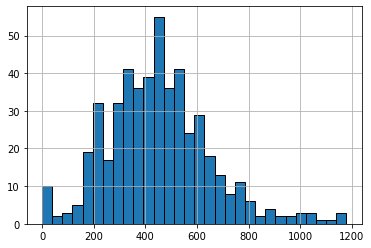

In [21]:
means = data_mix.pivot_table(index='user_id', values=['calls_sum', 'messages_count', 'internet_sum', 'vyruchka'], aggfunc='mean')
means.columns = ['calls_mean', 'internet_mean', 'messages_mean', 'vyruchka_mean']
display(means.head(10))
means['calls_mean'].hist(bins=30, ec='black')

<AxesSubplot:>

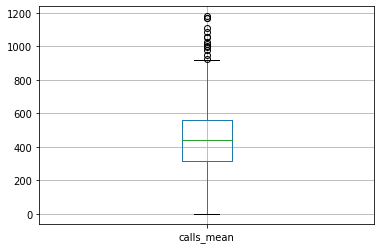

In [22]:
means.boxplot(column='calls_mean')

<AxesSubplot:>

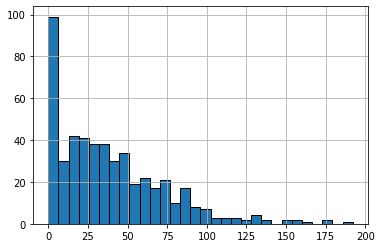

In [23]:
#display(messages_month.head(10))
means['messages_mean'].hist(bins=30, ec='black')

<AxesSubplot:>

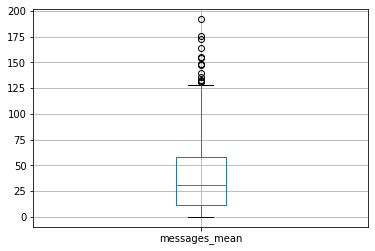

In [24]:
means.boxplot(column='messages_mean')

<AxesSubplot:>

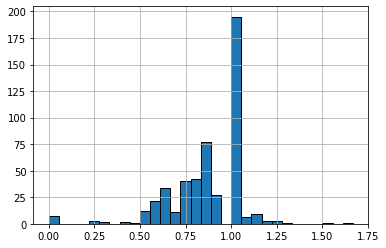

In [25]:
#display(internet_month.sample(10))
means['internet_mean'].hist(bins=30, ec='black')

<AxesSubplot:>

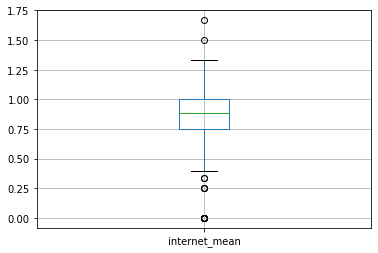

In [26]:
means.boxplot(column='internet_mean')

Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

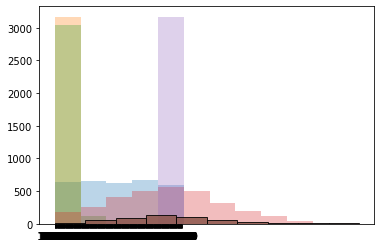

Среднее: 451.7867676333037
Дисперсия: 40705.611231545176
Стандартное откл.: 201.75631646009296


In [27]:
for column in calls_month.columns.values.tolist():
    plt.hist(calls_month[column], range=(1,1000), alpha=0.3)
plt.hist(means['calls_mean'], alpha=0.85, ec='black')
plt.show()
print("Среднее:", means['calls_mean'].mean())
print("Дисперсия:", means['calls_mean'].var())
print("Стандартное откл.:", means['calls_mean'].std())

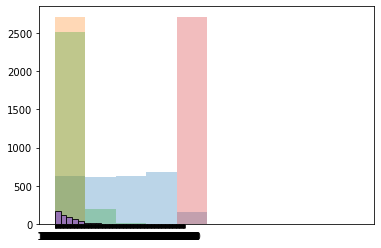

Среднее: 38.79473369669153
Дисперсия: 1227.8153932597866
Стандартное откл.: 35.0401968210766


In [28]:
for column in messages_month.columns.values.tolist():
    plt.hist(messages_month[column], range=(1,1000), alpha=0.3)
plt.hist(means['messages_mean'], alpha=0.85, ec='black')
plt.show()
print("Среднее:", means['messages_mean'].mean())
print("Дисперсия:", means['messages_mean'].var())
print("Стандартное откл.:", means['messages_mean'].std())

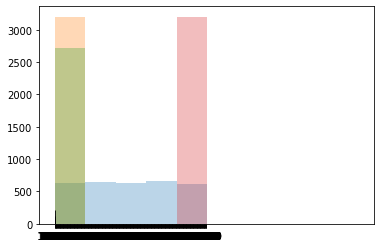

Среднее: 0.8612769258853595
Дисперсия: 0.03950622869760613
Стандартное откл.: 0.1987617385152538


In [29]:
for column in internet_month.columns.values.tolist():
    plt.hist(internet_month[column], range=(1,1000), alpha=0.3)
plt.hist(means['internet_mean'], alpha=0.85, ec='black')
plt.show()
print("Среднее:", means['internet_mean'].mean())
print("Дисперсия:", means['internet_mean'].var())
print("Стандартное откл.:", means['internet_mean'].std())

#### Шаг 4. Проверим гипотезы

    средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    

Тариф "Смарт"

In [30]:
means = means.merge(users[['user_id', 'tariff']], on = 'user_id')
smart = means.loc[means['tariff']=='smart']
display(smart.sample(50))
print("Среднее:", smart['calls_mean'].mean())
print("Дисперсия:", smart['calls_mean'].var())
print("Стандартное откл.:", smart['calls_mean'].std())

,user_id,calls_mean,internet_mean,messages_mean,vyruchka_mean,tariff
9,1009.0,218.900000,0.900000,11.0,550.000000,smart
424,1426.0,545.250000,0.750000,64.0,754.750000,smart
286,1287.0,413.250000,0.750000,6.0,613.000000,smart
70,1070.0,322.600000,1.200000,12.0,558.400000,smart
6,1006.0,318.272727,0.909091,0.0,550.000000,smart
429,1431.0,244.600000,0.700000,81.0,644.200000,smart
174,1175.0,292.444444,1.000000,0.0,550.000000,smart
47,1047.0,564.333333,1.000000,48.0,1173.000000,smart
130,1131.0,263.000000,1.000000,30.0,550.000000,smart
341,1342.0,366.333333,1.000000,71.0,749.000000,smart


Среднее: 419.6348029272315
Дисперсия: 21034.14860688592
Стандартное откл.: 145.03154348929036


In [31]:
print("Среднее:", smart['messages_mean'].mean())
print("Дисперсия:", smart['messages_mean'].var())
print("Стандартное откл.:", smart['messages_mean'].std())

Среднее: 32.352078231292516
Дисперсия: 702.9099096396594
Стандартное откл.: 26.512448201545993


In [32]:
print("Среднее:", smart['internet_mean'].mean())
print("Дисперсия:", smart['internet_mean'].var())
print("Стандартное откл.:", smart['internet_mean'].std())

Среднее: 0.8668661100803958
Дисперсия: 0.03880509130712302
Стандартное откл.: 0.1969900792099009


<AxesSubplot:>

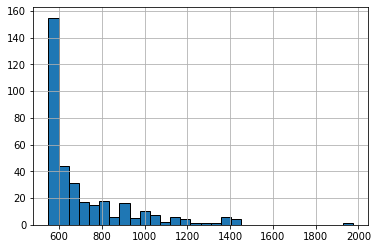

In [33]:
smart['vyruchka_mean'].hist(bins=30, ec='black')

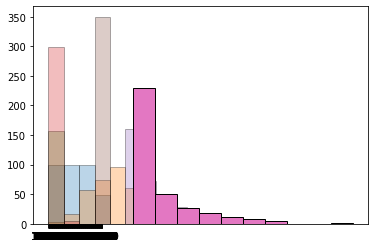

In [34]:
for column in smart.columns.values.tolist():
    plt.hist(smart[column], range=(1,1000), alpha=0.3, ec='black')
plt.hist(smart['vyruchka_mean'], ec='black')
plt.show()    

In [35]:
print("Среднее:", smart['vyruchka_mean'].mean())
print("Дисперсия:", smart['vyruchka_mean'].var())
print("Стандартное откл.:", smart['vyruchka_mean'].std())

Среднее: 706.9938661100805
Дисперсия: 47492.26087285426
Стандартное откл.: 217.92719167844626


Тариф ультра

In [36]:
ultra = means.loc[means['tariff']=='ultra']
display(ultra.sample(50))
print("Среднее:", ultra['calls_mean'].mean())
print("Дисперсия:", ultra['calls_mean'].var())
print("Стандартное откл.:", ultra['calls_mean'].std())

,user_id,calls_mean,internet_mean,messages_mean,vyruchka_mean,tariff
270,1271.0,361.400000,1.000000,86.4,1950.0,ultra
329,1330.0,640.818182,0.727273,73.0,1950.0,ultra
302,1303.0,472.833333,0.833333,26.0,1950.0,ultra
351,1352.0,751.777778,1.111111,8.0,1950.0,ultra
269,1270.0,314.500000,1.000000,48.0,1950.0,ultra
275,1276.0,391.666667,1.000000,26.0,1950.0,ultra
453,1455.0,461.000000,0.600000,4.0,1950.0,ultra
397,1399.0,318.500000,0.500000,65.0,1950.0,ultra
343,1344.0,824.222222,0.777778,125.0,1950.0,ultra
258,1259.0,646.000000,1.000000,164.0,1950.0,ultra


Среднее: 527.8218193030694
Дисперсия: 79403.5518504411
Стандартное откл.: 281.78635852439896


In [37]:
print("Среднее:", ultra['messages_mean'].mean())
print("Дисперсия:", ultra['messages_mean'].var())
print("Стандартное откл.:", ultra['messages_mean'].std())

Среднее: 54.03074324324324
Дисперсия: 2149.8287933213824
Стандартное откл.: 46.36624627162935


In [38]:
print("Среднее:", ultra['internet_mean'].mean())
print("Дисперсия:", ultra['internet_mean'].var())
print("Стандартное откл.:", ultra['internet_mean'].std())

Среднее: 0.8480592605592605
Дисперсия: 0.04118930996863014
Стандартное откл.: 0.2029514965912549


<AxesSubplot:>

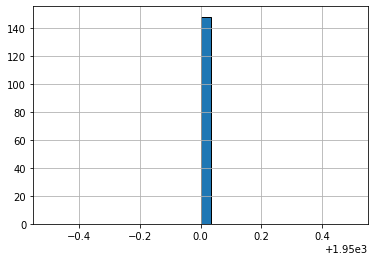

In [39]:
ultra['vyruchka_mean'].hist(bins=30, ec='black')

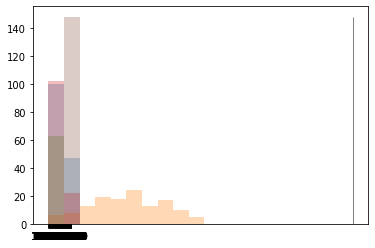

In [40]:
for column in ultra.columns.values.tolist():
    plt.hist(ultra[column], range=(1,1000), alpha=0.3)
plt.hist(ultra['vyruchka_mean'], alpha=0.5, ec='black')
plt.show()

In [41]:
print("Среднее:", ultra['vyruchka_mean'].mean())
print("Дисперсия:", ultra['vyruchka_mean'].var())
print("Стандартное откл.:", ultra['vyruchka_mean'].std())

Среднее: 1950.0
Дисперсия: 0.0
Стандартное откл.: 0.0


Сравнение двух тарифов показывает, что пользователи тарифа "Ультра" укладываются в лимиты и платят только по тарифному плану, а пользователи тарифа "Смарт" в большей степени платят по тарифу, однако, многие и переплачивают, так как не укладываются в лимиты, поэтому среднее больше стоимости тарифного плана. При сравнении отдельных показателей мы видим, что пользователи тарифного плана "Ультра" в среднем больше звонят и пишут смс, а использование интернета в рамках лимита у двух тарифов почти одинаково. Таким образом, переход на тариф "ультра" выгоден только для очень малого числа пользователей тарифа "смарт", выручка которых приближается к 2000 в месяц.

Пороговое значение alpha задайте самостоятельно.
Поясните, как вы формулировали нулевую и альтернативную гипотезы;

Сформулируем нулевую гипотезу

1) Нулевая гипотеза:  "Средняя выручка от пользователей тарифа "Смарт" и пользователей "Ультра" одинакова".

2) Альтернативная гипотеза: "Средняя выручка от пользователей тарифа "Смарт" и пользователей "Ультра" различается".
Примем уровень значимости в 5%

In [42]:
#vyruchka['mean'] = vyruchka.mean(axis=1)
#vyruchka['mean'].hist(bins=30, ec='black')

In [43]:
alpha = .05

results = st.ttest_ind(smart['vyruchka_mean'].dropna(), ultra['vyruchka_mean'].dropna(), equal_var=False) 

print('p-значение:', results.pvalue) # ваш код: выведите на экран получившееся p-значение)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.7040779049868703e-268
Отвергаем нулевую гипотезу


Следовательно, наша гипотеза о том, что выручка различается верна

Проверим вторую гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

,user_id,calls_mean,internet_mean,messages_mean,vyruchka_mean,tariff,city
1,1001.0,422.000000,1.000000,0.0,550.0,smart,Москва
3,1003.0,764.400000,1.000000,76.0,1950.0,ultra,Москва
7,1007.0,486.555556,1.111111,25.0,669.0,smart,Москва
31,1031.0,613.500000,1.000000,26.0,890.5,smart,Москва
33,1033.0,349.666667,0.833333,69.0,614.0,smart,Москва
38,1038.0,319.333333,1.000000,10.0,550.0,smart,Москва
41,1041.0,436.500000,1.000000,13.0,1091.5,smart,Москва
49,1049.0,588.000000,0.700000,0.0,1950.0,ultra,Москва
51,1051.0,292.666667,1.000000,2.5,558.5,smart,Москва
57,1057.0,778.800000,1.000000,25.0,1950.0,ultra,Москва


<AxesSubplot:>

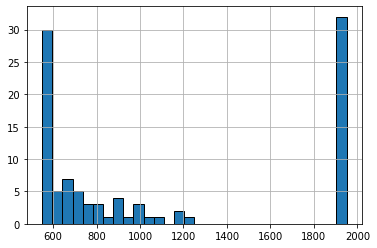

In [44]:
means = means.merge(users[['user_id','city']], on='user_id', how='right')
Moscow_users=means.loc[means['city']=='Москва']
display(Moscow_users.head(10))
Moscow_users['vyruchka_mean'].hist(bins=30, ec='black')

,user_id,calls_mean,internet_mean,messages_mean,vyruchka_mean,tariff,city
0,1000.0,320.750000,1.250000,62.0,1950.0,ultra,Краснодар
2,1002.0,216.714286,0.857143,10.0,550.0,smart,Стерлитамак
4,1004.0,123.375000,1.000000,149.0,1950.0,ultra,Новокузнецк
5,1005.0,550.416667,1.000000,46.0,827.0,smart,Набережные Челны
6,1006.0,318.272727,0.909091,0.0,550.0,smart,Ульяновск
8,1008.0,339.000000,1.000000,56.0,568.0,smart,Челябинск
9,1009.0,218.900000,0.900000,11.0,550.0,smart,Пермь
10,1010.0,231.000000,1.000000,0.0,550.0,smart,Тюмень
11,1011.0,432.800000,1.100000,11.0,594.4,smart,Самара
12,1012.0,251.600000,1.100000,15.0,550.0,smart,Санкт-Петербург


<AxesSubplot:>

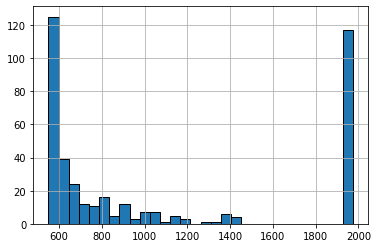

In [45]:
not_Moscow_users=means.loc[means['city']!='Москва']
display(not_Moscow_users.head(10))
not_Moscow_users['vyruchka_mean'].hist(bins=30, ec='black')

Сформулируем нулевую гипотезу: 
1) Нулевая гипотеза: выручка пользователей из Москвы и пользователей из других регионов отличается.
2) Альтернативная гипотеза: выручка пользователей из Москвы и пользователей из других регионов одинакова.
Примем уровень значимости в 5%

In [46]:
#vyruchka_good = pd.concat([vyruchka, vyruchka['city']], axis=1)

In [47]:
alpha = .05

results = (
    st.ttest_ind(
        Moscow_users['vyruchka_mean'].dropna(), 
        not_Moscow_users['vyruchka_mean'].dropna(), 
        equal_var=False)
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6560108567477669
Не получилось отвергнуть нулевую гипотезу


Гипотеза о том, что выручка пользователей из Москвы и пользователей из других регионов различается не подтвердилась.

Для проверки гипотез использовала alpha = .05

#### Шаг 5. Общий вывод

Были проверены данные на пропуски и на аномалии. Убраны: столбец с неактуальной информацией из таблицы по трафику. И строки с нулевыми значениями из таблицы по трафику и из таблицы со звонками.

Было определено, что среди всех клиентов не пользовались интернетом 3 человека, не звонили 8, не писали 74. В большей степени, клиенты используют интернет-услугу.

Были созданы по каждой категории данных таблицы, ранжированные по клиентам и месяцам. Посчитана выручка, которую принес компании каждый клиент, что отражено в отдельной таблице. По всем этим таблицам посчитаны среднее арифметическое, дисперсия и стандартное отклонение и сделаны графики. 

Сравнение двух тарифов показывает, что пользователи тарифа "Ультра" укладываются в лимиты и платят только по тарифному плану, а пользователи тарифа "Смарт" в большей степени платят по тарифу, однако, многие и переплачивают, так как не укладываются в лимиты, поэтому среднее больше стоимости тарифного плана. При сравнении отдельных показателей мы видим, что пользователи тарифного плана "Ультра" в среднем больше звонят и пишут смс, а использование интернета в рамках лимита у двух тарифов почти одинаково. Таким образом, переход на тариф "Ультра" выгоден только для очень малого числа пользователей тарифа "Смарт", выручка которых приближается к 2000 в месяц. Для большинства пользователей тарифа "Смарт" выгоден. А часть пользователей тарифа "Ультра" могли бы сэкономить и перейти на тариф "Смарт" без потерь для своих привычных объемов по использованию услуг.

Для проверки гипотез были сделаны две выборки, по типу тарифа и по городу клиента. Первая гипотеза о том, что выручка по тарифам различается подтвердилась. А вторая гипотеза, про выручку пользователей из Москвы и пользователей других регионов, не подтвердилась. Распределение выручки в Москве и в регионах очень близкое.